In [1]:
%matplotlib inline

# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

# Load and read
city_data_df=pd.read_csv("Inputs Data/city_data.csv")
ride_data_df=pd.read_csv("Inputs Data/ride_data.csv")
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [2]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [3]:
### city_data
# columns and the rows that are not null
city_data_df.count()
#OR # Get the columns and the rows that are not null
#city_data_df.isnull().sum()

# Type
city_data_df.dtypes

# Unique values of the type of city
city_data_df["type"].unique()

# Data points from the Urban,'Suburban','Rural' cities.
sum(city_data_df["type"]=='Urban')
sum(city_data_df["type"]=='Suburban')
sum(city_data_df["type"]=='Rural')
#----------------------------------------------------------------
##ride_data
#columns and the rows that are not null
ride_data_df.count()
ride_data_df.isnull().sum()

#Type
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [4]:
#Merge
pyber_data_df=pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
#Create Dataframe for each city type
# Urban, Suburban, and Rural
urban_cities_df=pyber_data_df[pyber_data_df['type']=='Urban']
suburban_cities_df=pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df=pyber_data_df[pyber_data_df['type']=='Rural']

In [6]:
#Number of rides for each city type
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]

In [7]:
#Average fare for each city in each city type
urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]

In [8]:
#Average of drivers for each city in each city type
urban_driver_count=urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count=suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count=rural_cities_df.groupby(["city"]).mean()["driver_count"]

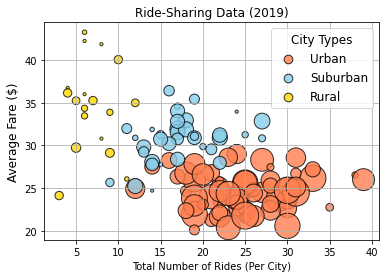

In [9]:
# Scatter plots for all city types.
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Show the plot
plt.title("Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()


# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.

# plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
#plt.savefig("Results/Fig1.png")


In [10]:
# Summary statistics for each city type
urban_cities_df.describe()
suburban_cities_df.describe()
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [11]:
# Summary statistics for each city type
urban_ride_count.describe()
suburban_ride_count.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [12]:
# Measures of central tendency for each city type (First option)

mean_urban_ride_count1 =(round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2))
median_urban_ride_count1=round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)
mode_urban_ride_count1=round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

In [13]:
# Measures of central tendency for the ride count for each city type using numpy (Second option)
#Urban
mean_urban_ride_count2 = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count2:.2f}.")

median_urban_ride_count2 = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count2}.")

mode_urban_ride_count2 = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count2}.")
#---------------------------------------------------------------------------------------
mean_suburban_ride_count2 = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count2:.2f}.")

median_suburban_ride_count2 = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count2}.")

mode_suburban_ride_count2 = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count2}.")
#------------------------------------------------------------------------------------------
mean_rural_ride_count2 = np.mean(rural_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_rural_ride_count2:.2f}.")

median_rural_ride_count2 = np.median(rural_ride_count)
print(f"The median for the ride counts for suburban trips is {median_rural_ride_count2}.")

mode_rural_ride_count2 = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_rural_ride_count2}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).
The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).
The mean for the ride counts for suburban trips is 6.94.
The median for the ride counts for suburban trips is 6.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([6]), count=array([5])).


In [14]:
#Fares for each type of city
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

# Measures of central tendency for the average fare for each type of city
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")
#------------------------------------------------------------------------------------
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")
#-------------------------------------------------------------------------------------
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for suburban trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_rural_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mean fare price for rural trips is $34.62.
The median fare price for suburban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


In [15]:
#Driver count data from each city type
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()
print(urban_drivers.mean())
print(urban_drivers.median())
print(urban_drivers.mode())
#----------------------------------------------------
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()
print(suburban_drivers.mean())
print(suburban_drivers.median())
print(suburban_drivers.mode())
#---------------------------------------------------
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()
print(rural_drivers.mean())
print(rural_drivers.median())
print(rural_drivers.mode())

36.67815384615385
37.0
0    39
dtype: int64
13.712
16.0
0    20
dtype: int64
4.296
4.0
0    1
dtype: int64


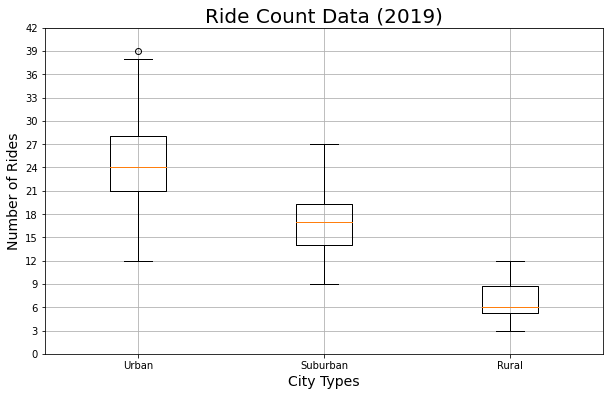

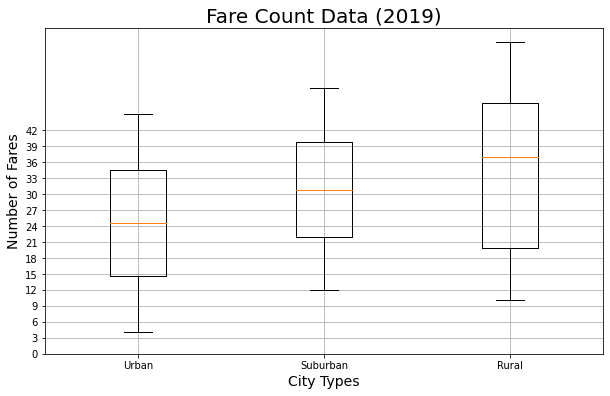

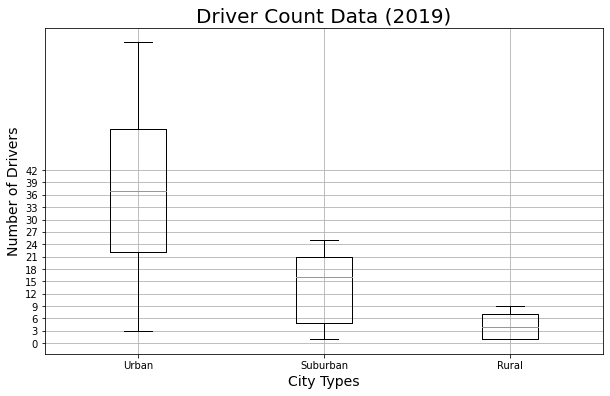

In [16]:
# Box-and-whisker plots for each city type 
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
#plt.savefig("Results/Fig2.png")
plt.show()

#box-and-whisker plot for the urban driver count data
# x_labels = ["Urban"]
# fig, ax = plt.subplots()
# ax.boxplot(urban_drivers,labels=x_labels)
# # Add the title, y-axis label and grid.
# ax.set_title('Driver Count Data (2019)')
# ax.set_ylabel('Number of Drivers)')
# ax.set_yticks(np.arange(0, 90, step=5.0))
# ax.grid()
# plt.show()
# print("Summary Statistics")
# urban_drivers.describe()

# Box-and-whisker plot for the urban fare data.
# x_labels = ["Urban"]
# fig, ax = plt.subplots()
# ax.boxplot(urban_fares, labels=x_labels)
# # Add the title, y-axis label and grid.
# ax.set_title('Ride Fare Data (2019)')
# ax.set_ylabel('Fare($USD)')
# ax.set_yticks(np.arange(0, 51, step=5.0))
# ax.grid()
# plt.show()
# print("Summary Statistics")
# urban_fares.describe()

# Box-and-whisker plot for each city type
x_labels = ["Urban", "Suburban","Rural"]
fare_count_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Fare Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Fares',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
#plt.savefig("Results/Fig3.png")
plt.show()

# Box-and-whisker plot for each type of city
x_labels = ["Urban", "Suburban","Rural"]
fare_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
#plt.savefig("Results/Fig4.png")
plt.show()

# # Create the box-and-whisker plot for the urban driver count data.
# x_labels = ["Urban"]
# fig, ax = plt.subplots()
# ax.boxplot(urban_drivers,labels=x_labels)
# # Add the title, y-axis label and grid.
# ax.set_title('Driver Count Data (2019)')
# ax.set_ylabel('Number of Drivers)')
# ax.set_yticks(np.arange(0, 90, step=5.0))
# ax.grid()
# plt.show()

# print("Summary Statistics")
# urban_drivers.describe()
#urban_ride_count.describe()

In [17]:
# Outlier (mach 39)
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count")

West Angela has the highest rider count


In [18]:
#Fares sum for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

# Percentage of fare for each city type
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()

# Pie chart for percentage of fares by city type
# plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
# plt.show()

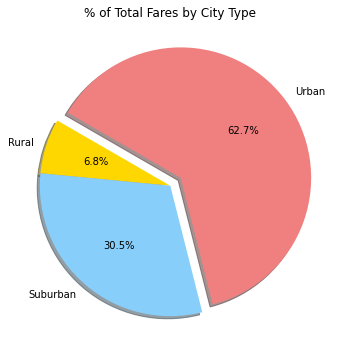

In [19]:
import matplotlib as mpl

# Pie chart of total fares by city type
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14
#plt.savefig("Results/Fig5.png")
plt.show()

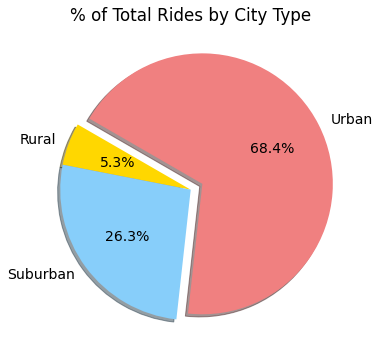

In [20]:
# Percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

# Pie chart for percentage of rides by city type
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
mpl.rcParams['font.size'] = 14
#plt.savefig("Results/Fig6.png")
plt.show()

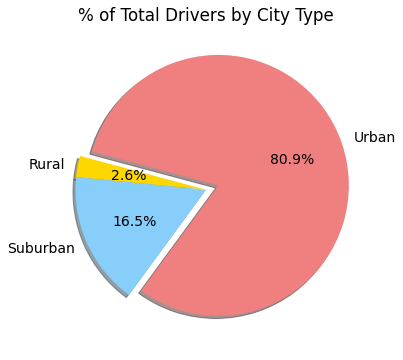

In [21]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] /city_data_df["driver_count"].sum()

plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
mpl.rcParams['font.size'] = 14
#plt.savefig("Results/Fig7.png")
plt.show()

In [22]:
# Summary dataframe
#Total rides for each city type
total_rides=pyber_data_df.groupby(['type']).count()['ride_id']

#Total drivers for each city type
total_drivers=city_data_df.groupby('type').sum()['driver_count']

#Total amount of fares for each city type
total_fares=pyber_data_df.groupby('type').sum()['fare']

#average fare per ride for each city type
fare_ave_ride=total_fares/total_rides

#average fare per driver for each city type
fare_ave_driver=total_fares/total_drivers

#Summary dataframe
df_summary=pd.DataFrame({'Total Rides':total_rides,
                         'Total Drivers':total_drivers,
                          'Total Fares':total_fares,
                          'Average Fare per Ride':fare_ave_ride,
                         'Average Fare per Driver':fare_ave_driver})


#Clean up dataframe (eliminate index name)
df_summary.index.name = None

#Format 
df_summary['Total Rides']=df_summary['Total Rides'].map('{:,}'.format)
df_summary['Total Drivers']=df_summary['Total Drivers'].map('{:,}'.format)
df_summary['Total Fares']=df_summary['Total Fares'].map('${:,.2f}'.format)
df_summary['Average Fare per Ride']=df_summary['Average Fare per Ride'].map('${:.2f}'.format)
df_summary['Average Fare per Driver']=df_summary['Average Fare per Driver'].map('${:.2f}'.format)
df_summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [23]:
# Created line plot to represent total weekly related to fares for each city type

pyber_data_df_new1=pyber_data_df
#Create a new DataFrame showing the sum of the fares for each date where the indices are the city type and date.
new_series=pyber_data_df_new1.groupby(['type','date']).sum()['fare']

#Reset the index on previous DataFrame.This is nessessary to use the 'pivot()' function.
pyber_data_df_new1= pyber_data_df_new1.reset_index()

#Create a pivot table  get the total fares for each type of city by the date
#the 'date' as the index, the columns ='type', and values='fare' 
pyber_data_pivot_new1=pd.pivot_table(pyber_data_df_new1,values='fare',index='date',columns ='type')

#Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'
pyber_data_pd_new2=pyber_data_pivot_new1.loc['2019-01-01':'2019-04-29',:]
pyber_data_pd_new2

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [24]:
#Set the "date" index to datetime datatype. This is necessary to use the resample() method.
pyber_data_pd_new2.index =pd.to_datetime(pyber_data_pd_new2.index)
 
#Check that the datatype for the index is datetime using df.info()
pyber_data_pd_new2.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [25]:
#Get the sum of the fares for each week by creating a new DataFrame using the "resample()" function by week 'W' and 
pyber_data_pd_new3=pyber_data_pd_new2.resample('W').sum()
pyber_data_pd_new3

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


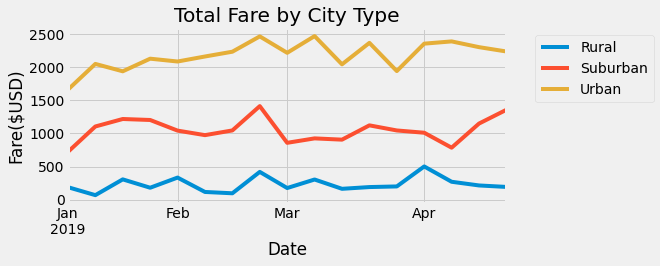

In [26]:
#plot

from matplotlib import style

# Use the graph style fivethirtyeight
style.use('fivethirtyeight')

pyber_data_pd_new3.plot(figsize=(7, 3))
plt.xlabel('Date')
plt.ylabel('Fare($USD)')
plt.title('Total Fare by City Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.savefig("Results/Fig8.png")